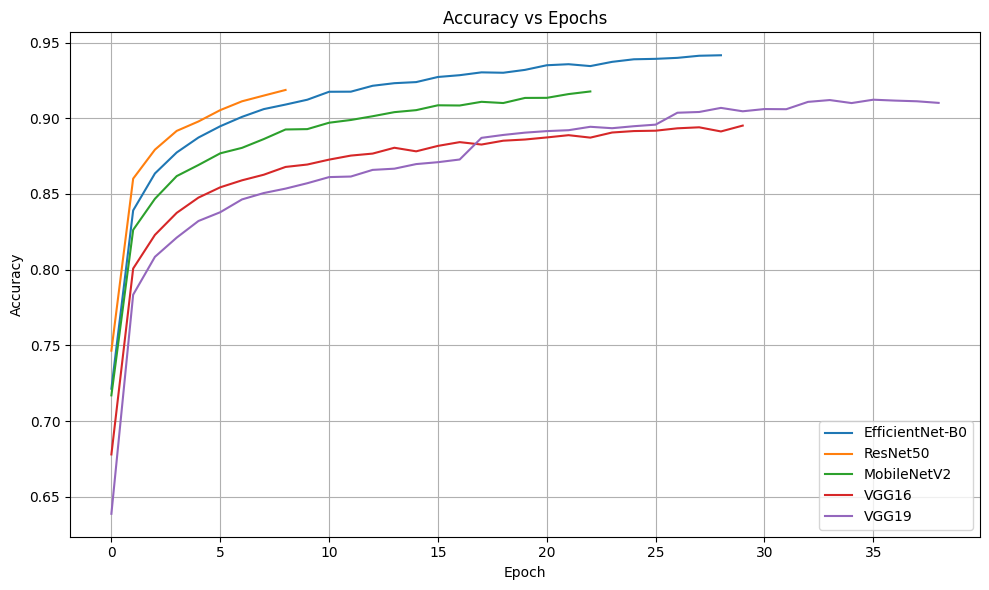

In [13]:
# Initial training graphs
import os
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = 'D:/Major Project/Graphs'
model_files = {
    'EfficientNet-B0': 'training_history_initial_efficientnetb0.csv',
    'ResNet50': 'training_history_initial_resnet50.csv',
    'MobileNetV2': 'training_history_initial_mobilenet.csv',
    'VGG16': 'training_history_initial_vgg16.csv',
    'VGG19': 'training_history_initial_vgg19.csv',
}
plt.figure(figsize=(10, 6))
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

for model_name, filename in model_files.items():
    filepath = os.path.join(DATA_DIR, filename)
    data = pd.read_csv(filepath)
    
    if 'epoch' not in data.columns or 'accuracy' not in data.columns:
        print(f"Warning: {filename} missing 'epoch' or 'accuracy' columns")
        continue

    plt.plot(data['epoch'], data['accuracy'], label=model_name)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("D:/Major Project/Graphs/accuracy_vs_epoch_initial training.png") 
plt.show()

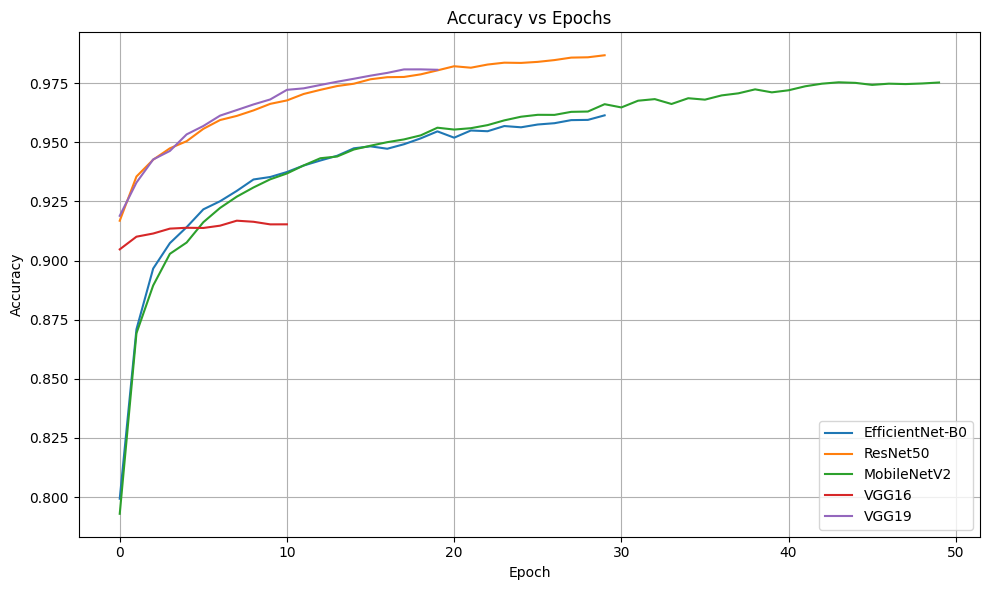

In [15]:
# Fine training graphs
import os
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = 'D:/Major Project/Graphs'
model_files = {
    'EfficientNet-B0': 'training_history_fine_efficientnetb0.csv',
    'ResNet50': 'training_history_fine_resnet50.csv',
    'MobileNetV2': 'training_history_fine_mobilenet.csv',
    'VGG16': 'training_history_fine_vgg16.csv',
    'VGG19': 'training_history_fine_vgg19.csv',
}
plt.figure(figsize=(10, 6))
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

for model_name, filename in model_files.items():
    filepath = os.path.join(DATA_DIR, filename)
    data = pd.read_csv(filepath)
    
    if 'epoch' not in data.columns or 'accuracy' not in data.columns:
        print(f"Warning: {filename} missing 'epoch' or 'accuracy' columns")
        continue

    plt.plot(data['epoch'], data['accuracy'], label=model_name)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("D:/Major Project/Graphs/accuracy_vs_epoch_fine training.png") 
plt.show()


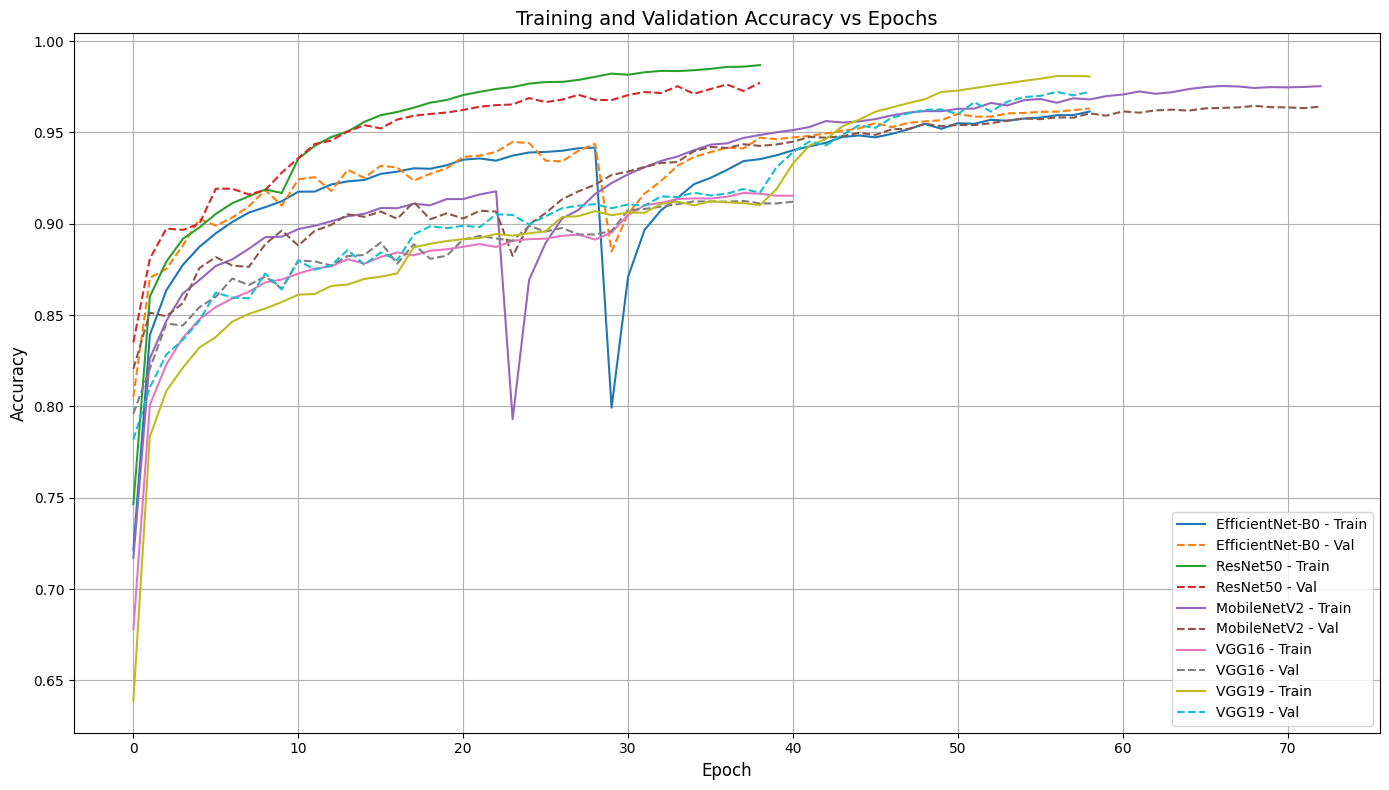


Plot saved at: D:/Major Project/Graphs/combined_accuracy_val_accuracy_vs_epoch.png


In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt

INITIAL_DIR = 'D:/Major Project/Graphs/initial'
FINETUNED_DIR = 'D:/Major Project/Graphs/finetuned'

models = ['efficientnetb0', 'resnet50', 'mobilenet', 'vgg16', 'vgg19']
model_labels = {
    'efficientnetb0': 'EfficientNet-B0',
    'resnet50': 'ResNet50',
    'mobilenet': 'MobileNetV2',
    'vgg16': 'VGG16',
    'vgg19': 'VGG19',
}

plt.figure(figsize=(14, 8))
plt.title('Training and Validation Accuracy vs Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

for model in models:
    model_name = model_labels[model]
    
    initial_path = os.path.join(INITIAL_DIR, f'training_history_initial_{model}.csv')
    fine_path = os.path.join(FINETUNED_DIR, f'training_history_finetuned_{model}.csv')

    if not os.path.exists(initial_path) or not os.path.exists(fine_path):
        print(f"Missing CSV files for {model_name}")
        continue

    initial_df = pd.read_csv(initial_path)
    fine_df = pd.read_csv(fine_path)

    required_cols = {'epoch', 'accuracy', 'val_accuracy'}
    if not required_cols.issubset(initial_df.columns) or not required_cols.issubset(fine_df.columns):
        print(f"Missing columns in CSV for {model_name}")
        continue

    last_epoch = initial_df['epoch'].max()
    fine_df['epoch'] = fine_df['epoch'] + last_epoch + 1

    combined_df = pd.concat([initial_df, fine_df], ignore_index=True)

    plt.plot(combined_df['epoch'], combined_df['accuracy'], label=f'{model_name} - Train')
    plt.plot(combined_df['epoch'], combined_df['val_accuracy'], linestyle='--', label=f'{model_name} - Val')

plt.legend()
plt.grid(True)
plt.tight_layout()

output_path = 'D:/Major Project/Graphs/combined_accuracy_val_accuracy_vs_epoch.png'
plt.savefig(output_path)
plt.show()

print(f"\nPlot saved at: {output_path}")


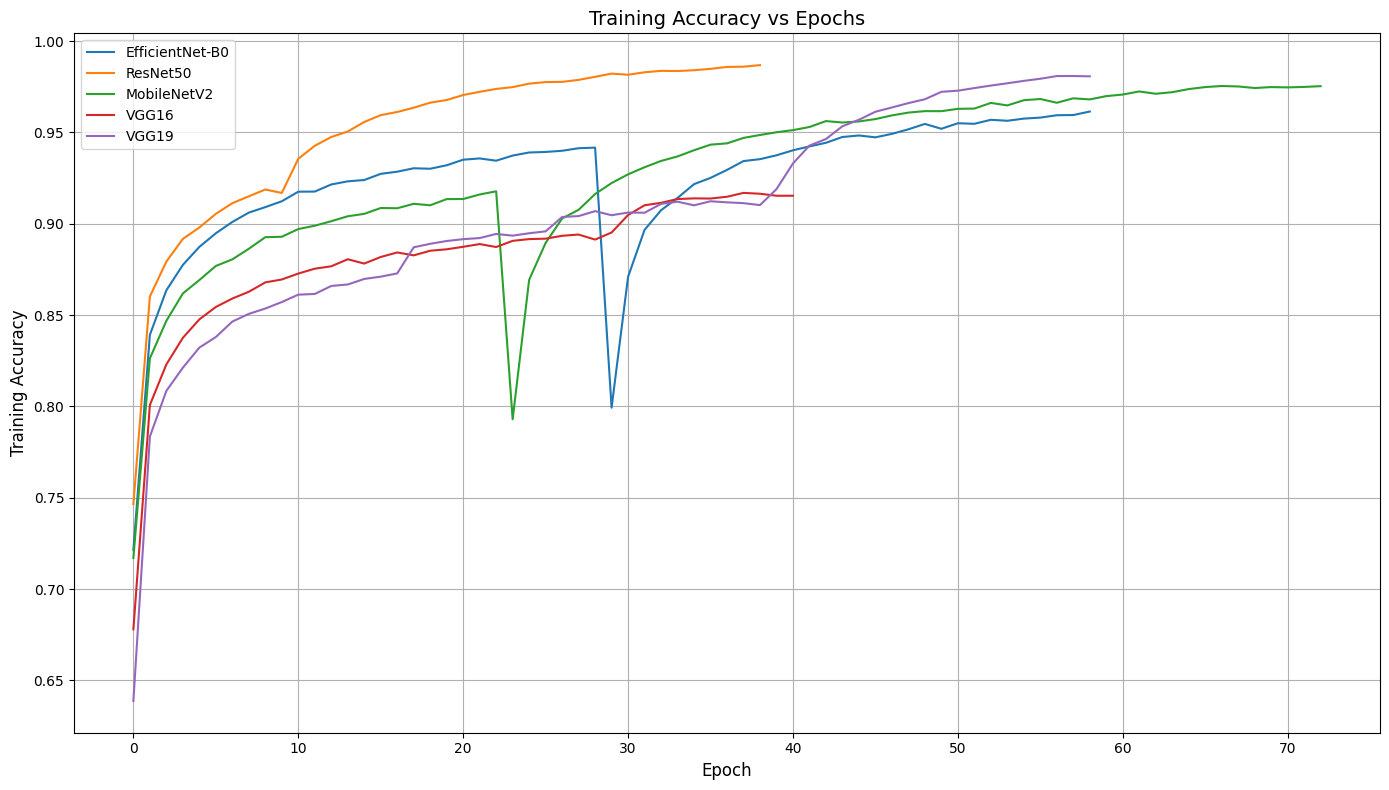


Plot saved at: D:/Major Project/Graphs/combined_training_accuracy_vs_epoch.png


In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt

INITIAL_DIR = 'D:/Major Project/Graphs/initial'
FINETUNED_DIR = 'D:/Major Project/Graphs/finetuned'

models = ['efficientnetb0', 'resnet50', 'mobilenet', 'vgg16', 'vgg19']
model_labels = {
    'efficientnetb0': 'EfficientNet-B0',
    'resnet50': 'ResNet50',
    'mobilenet': 'MobileNetV2',
    'vgg16': 'VGG16',
    'vgg19': 'VGG19',
}

plt.figure(figsize=(14, 8))
plt.title('Training Accuracy vs Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Training Accuracy', fontsize=12)

for model in models:
    model_name = model_labels[model]

    initial_path = os.path.join(INITIAL_DIR, f'training_history_initial_{model}.csv')
    fine_path = os.path.join(FINETUNED_DIR, f'training_history_finetuned_{model}.csv')

    if not os.path.exists(initial_path) or not os.path.exists(fine_path):
        print(f"Missing CSV files for {model_name}")
        continue

    initial_df = pd.read_csv(initial_path)
    fine_df = pd.read_csv(fine_path)

    if 'epoch' not in initial_df.columns or 'accuracy' not in initial_df.columns:
        print(f"Missing required columns in the initial CSV for {model_name}")
        continue
    if 'epoch' not in fine_df.columns or 'accuracy' not in fine_df.columns:
        print(f"Missing required columns in the fine-tuned CSV for {model_name}")
        continue

    last_epoch = initial_df['epoch'].max()
    fine_df['epoch'] = fine_df['epoch'] + last_epoch + 1
    combined_df = pd.concat([initial_df, fine_df], ignore_index=True)
    plt.plot(combined_df['epoch'], combined_df['accuracy'], label=f'{model_name}')

plt.legend()
plt.grid(True)
plt.tight_layout()

output_path = 'D:/Major Project/Graphs/combined_training_accuracy_vs_epoch.png'
plt.savefig(output_path)
plt.show()

print(f"\nPlot saved at: {output_path}")


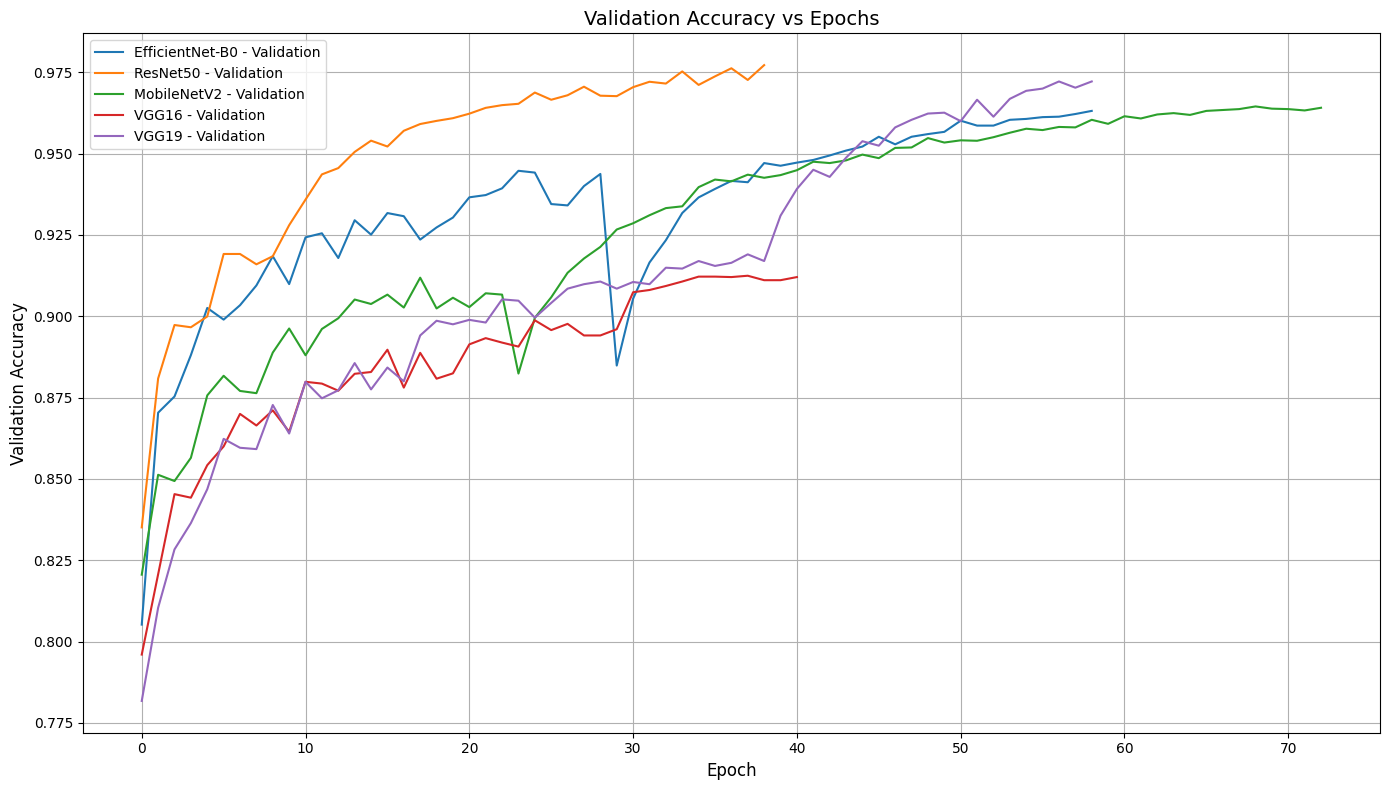


Plot saved at: D:/Major Project/Graphs/combined_validation_accuracy_vs_epoch.png


In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

INITIAL_DIR = 'D:/Major Project/Graphs/initial'
FINETUNED_DIR = 'D:/Major Project/Graphs/finetuned'

models = ['efficientnetb0', 'resnet50', 'mobilenet', 'vgg16', 'vgg19']
model_labels = {
    'efficientnetb0': 'EfficientNet-B0',
    'resnet50': 'ResNet50',
    'mobilenet': 'MobileNetV2',
    'vgg16': 'VGG16',
    'vgg19': 'VGG19',
}

plt.figure(figsize=(14, 8))
plt.title('Validation Accuracy vs Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)

for model in models:
    model_name = model_labels[model]
    
    initial_path = os.path.join(INITIAL_DIR, f'training_history_initial_{model}.csv')
    fine_path = os.path.join(FINETUNED_DIR, f'training_history_finetuned_{model}.csv')

    if not os.path.exists(initial_path) or not os.path.exists(fine_path):
        print(f"Missing CSV files for {model_name}")
        continue
    initial_df = pd.read_csv(initial_path)
    fine_df = pd.read_csv(fine_path)

    if 'epoch' not in initial_df.columns or 'val_accuracy' not in initial_df.columns:
        print(f"Missing required columns in the initial CSV for {model_name}")
        continue
    if 'epoch' not in fine_df.columns or 'val_accuracy' not in fine_df.columns:
        print(f"Missing required columns in the fine-tuned CSV for {model_name}")
        continue
    last_epoch = initial_df['epoch'].max()
    fine_df['epoch'] = fine_df['epoch'] + last_epoch + 1

    combined_df = pd.concat([initial_df, fine_df], ignore_index=True)
    plt.plot(combined_df['epoch'], combined_df['val_accuracy'], label=f'{model_name} - Validation', linestyle='-')

plt.legend()
plt.grid(True)
plt.tight_layout()

output_path = 'D:/Major Project/Graphs/combined_validation_accuracy_vs_epoch.png'
plt.savefig(output_path)
plt.show()

print(f"\nPlot saved at: {output_path}")
